In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# This is the data file with diagnosis info (anonymized)
diagnosis = pd.read_csv('data/ppmi-2018-08-28/Prodromal_Diagnostic_Questionnaire.csv').set_index('PATNO')
diagnosis.head()

,REC_ID,F_STATUS,EVENT_ID,PAG_NAME,PRIMDIAG,OTHNEURO,PSLVL2,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
PATNO,,,,,,,,,,,
10362,408770801,V,SC,PRODDIAG,17,NaN,4,08/2013,2013-08-23 11:37:07.0,NaN,08/2013
10405,605736601,V,SC,PRODDIAG,17,NaN,5,12/2016,2016-12-06 12:45:38.0,NaN,12/2016
10496,410987801,V,SC,PRODDIAG,23,NaN,5,09/2013,2013-09-05 11:40:13.0,NaN,09/2013
10606,409586301,S,SC,PRODDIAG,17,NaN,4,09/2013,2015-06-26 08:19:21.0,NaN,03/2015
10662,448326801,V,SC,PRODDIAG,17,NaN,5,07/2014,2014-07-16 08:08:30.0,NaN,07/2014


In [3]:
# This is the data file with diagnosis codes (anonymized)
codes = pd.read_csv('data/ppmi-2018-08-28/Code_List.csv')
codes.head()

,PAG_NAME,ITM_NAME,CDL_NAME,CODE,DECODE,LAST_UPDATE
0,AE,AEFLUP,YN,0,No,2010-12-06 07:13:10.0
1,AE,AEFLUP,YN,1,Yes,2010-12-06 07:13:10.0
2,AE,AEOUTCOM,AEOUTCOM,1,recovered,2010-12-06 07:13:10.0
3,AE,AEOUTCOM,AEOUTCOM,2,under treatment / observation,2010-12-06 07:13:10.0
4,AE,AEOUTCOM,AEOUTCOM,3,change in AE characteristic,2010-12-06 07:13:10.0


In [4]:
# Find all primary diagnosis codes and remove duplicates
codes = codes[codes['ITM_NAME']=='PRIMDIAG'][['CODE','DECODE']].groupby('CODE').first()
codes

,DECODE
CODE,
01,Idiopathic PD
02,Alzheimer's disease
03,Chromosome-17 frontotemporal dementia
04,Corticobasal degeneration
05,Dementia with Lewy bodies
06,Dopa-responsive dystonia
07,Essential tremor
08,Hemiparkinson/hemiatrophy syndrome
09,Juv. autosomal recessive parkinsonism


In [5]:
# Replace the numeric code in the diagnosis table with the text description above.
diagnosis['PRIMDIAG'] = diagnosis['PRIMDIAG'].map(lambda x:codes.loc['%.2d'%x,'DECODE'])

In [6]:
# This is the data file with smell test info
upsit = pd.read_csv('data/ppmi-2018-08-28/Olfactory_UPSIT.csv').set_index('SUBJECT_ID')
upsit.head()

,PROTOCOL_ID,COMPLT_DATE,SCENT_10_RESPONSE,SCENT_09_RESPONSE,SCENT_08_RESPONSE,SCENT_07_RESPONSE,SCENT_06_RESPONSE,SCENT_05_RESPONSE,SCENT_04_RESPONSE,SCENT_03_RESPONSE,...,SCENT_38_CORRECT,SCENT_37_CORRECT,SCENT_36_CORRECT,SCENT_35_CORRECT,SCENT_34_CORRECT,SCENT_33_CORRECT,SCENT_32_CORRECT,SCENT_31_CORRECT,TOTAL_CORRECT,UPSIIT_PRCNTGE
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
90000,P-PPMI Cohort,04/2013,2,3,2,1,2,3,4,4,...,1,1,0,1,1,1,1,1,38,98
90001,P-PPMI Cohort,04/2013,2,3,2,1,2,3,4,4,...,1,0,1,1,0,1,0,1,30,36
90002,P-PPMI Cohort,03/2013,2,3,2,1,2,1,4,4,...,1,1,1,1,0,1,1,1,28,36
90003,P-PPMI Cohort,04/2013,3,1,1,4,2,4,3,2,...,0,0,0,0,0,0,0,0,8,0
90004,P-PPMI Cohort,04/2013,1,3,2,1,2,3,4,4,...,1,1,0,1,1,1,0,1,32,75


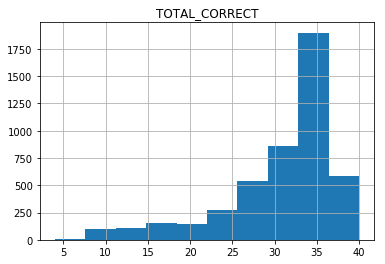

In [7]:
# Here is a histogram of total correct out of 40 for all of the subjects
upsit.hist('TOTAL_CORRECT');

In [8]:
# Merge the two tables using an inner join (only keep indices i.e. patient IDs that exist in both tables)
joined = upsit.join(diagnosis, how='inner')
print('There are %d patients common to both tables.' % joined.shape[0])

There are 407 patients common to both tables.


In [9]:
# Here is a break-down of the patient diagnoses (for all patients we have UPSIT data and diagnoses for).
joined['PRIMDIAG'].value_counts()

Prodromal non-motor PD                      215
No PD nor other neurological disorder       119
Prodromal motor PD                           35
Idiopathic PD                                33
Other neurological disorder(s) (specify)      2
Essential tremor                              2
Progressive supranuclear palsy                1
Name: PRIMDIAG, dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


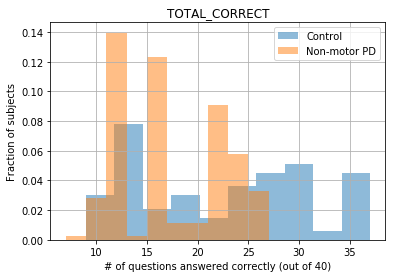

In [10]:
# Here are histograms of (non-motor) PD and controls.  
# You can see that the distributions overlap, but PD usually has worse smell.  
pro_nm_pd = joined[joined['PRIMDIAG']=='Prodromal non-motor PD']
control = joined[joined['PRIMDIAG']=='No PD nor other neurological disorder']
ax = control.hist('TOTAL_CORRECT', normed=True, alpha=0.5, label='Control');
pro_nm_pd.hist('TOTAL_CORRECT', ax=ax, normed=True, alpha=0.5, label='Non-motor PD');
plt.legend()
plt.xlabel('# of questions answered correctly (out of 40)')
plt.ylabel('Fraction of subjects');

In [11]:
# Here are all the columns in the joined table.  
# You can see that there are two columns for each of the 40 questions, one for what the response was, 
# and one for whether it is correct.  
# We should plan to try to predict the eventual diagnosis from this information.
# Eventually we want to incorporate time, so that we can predict future (years later) diagnoses
# from current UPSIT tests.  
#list(joined)

In [12]:
# These are all of the different diagnoses that appear in the dataset
joined['PRIMDIAG'].unique()

array(['No PD nor other neurological disorder', 'Prodromal non-motor PD',
       'Essential tremor', 'Prodromal motor PD', 'Idiopathic PD',
       'Other neurological disorder(s) (specify)',
       'Progressive supranuclear palsy'], dtype=object)

In [13]:
# Select only subjects with these two diagnoses
joined = joined[(joined['PRIMDIAG']=='No PD nor other neurological disorder') | (joined['PRIMDIAG']=='Prodromal non-motor PD')]


In [14]:
# Select only columns of interest
start = 2
end = -12
df = joined.iloc[ : , start:end]

In [15]:
# Ensure correct columns were chosen
df.head()

,SCENT_10_RESPONSE,SCENT_09_RESPONSE,SCENT_08_RESPONSE,SCENT_07_RESPONSE,SCENT_06_RESPONSE,SCENT_05_RESPONSE,SCENT_04_RESPONSE,SCENT_03_RESPONSE,SCENT_02_RESPONSE,SCENT_01_RESPONSE,...,SCENT_39_CORRECT,SCENT_38_CORRECT,SCENT_37_CORRECT,SCENT_36_CORRECT,SCENT_35_CORRECT,SCENT_34_CORRECT,SCENT_33_CORRECT,SCENT_32_CORRECT,SCENT_31_CORRECT,TOTAL_CORRECT
10362,2,4,2,3,2,4,2,3,1,3,...,1,1,1,0,1,0,1,0,1,18
10405,3,4,2,2,1,2,3,3,3,4,...,1,1,0,0,1,1,0,1,0,15
10496,2,3,2,1,3,3,4,4,1,2,...,0,1,1,0,1,1,1,0,0,27
10606,3,3,2,1,4,3,3,4,2,4,...,1,0,0,1,0,1,0,0,1,19
10662,4,3,2,1,2,3,4,3,2,1,...,1,1,1,0,0,0,0,1,0,20


In [16]:
# Encode qualitative response columns
need_dummies = []
for s in df.columns:
    if 'RESPONSE' in s:
        need_dummies.append(s)

In [17]:
# Create X and y from the dataframe
X = pd.get_dummies(df, columns=need_dummies, drop_first = True)
X = X.values

y = np.asarray(list((pd.get_dummies(joined['PRIMDIAG'], drop_first=True))['Prodromal non-motor PD']))

In [18]:
from sklearn.model_selection import GroupShuffleSplit

In [19]:
# Create cross validation method - group shuffle split
GSS = GroupShuffleSplit(n_splits=100)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Create classifier
clf = RandomForestClassifier(random_state=0, n_estimators=100)

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
# Perform shuffle split cross validation with grouping to avoid data leakage
cross_val_score(clf, X, y, groups=df.index, cv=GSS, scoring='accuracy').mean()   

0.532213890620101

In [24]:
cross_val_score(clf, X, y, groups=df.index, cv=GSS, scoring='roc_auc').mean()   

0.6859056580770273

In [25]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

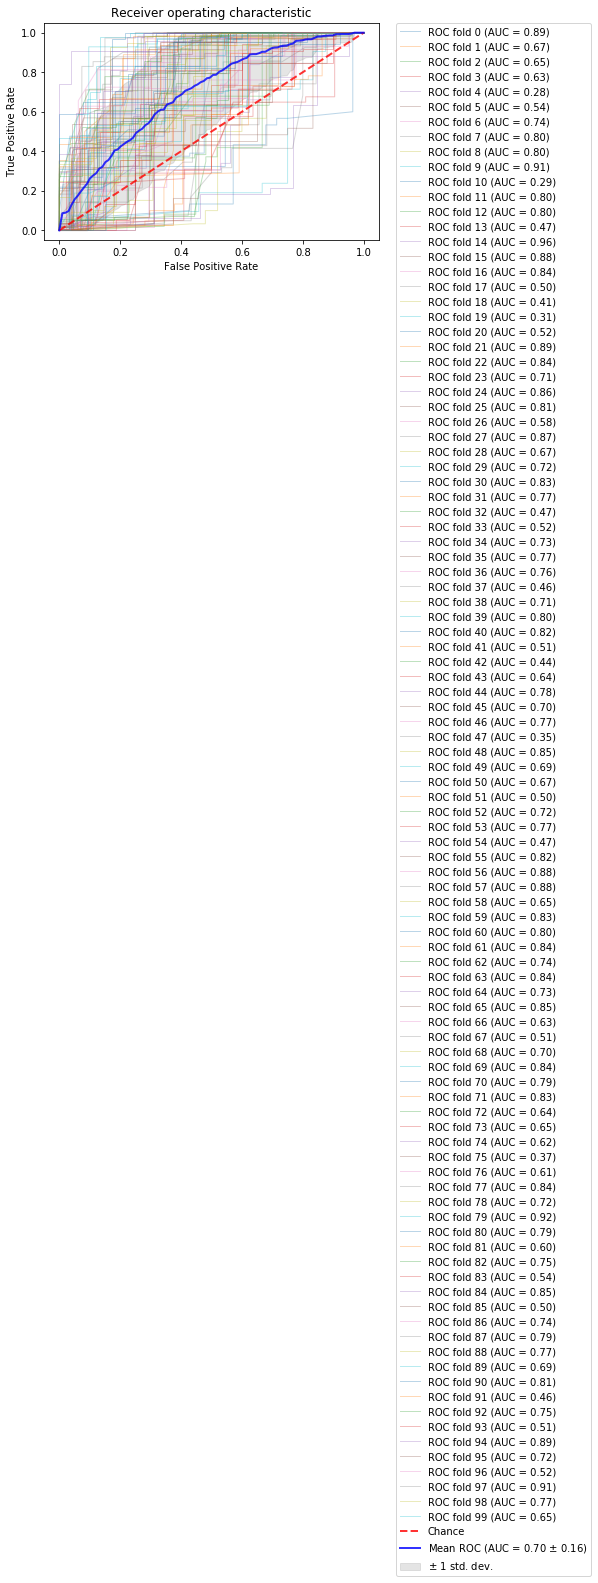

In [28]:
# Plot ROC curve
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in GSS.split(X, y, groups=df.index):
    probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()